# Calculate lensing SNR with CCL
In this example, we will calculate the lensing angular power spectrum for an example cosmology.

In [204]:
import numpy as np
import pylab as plt
import pyccl as ccl
%matplotlib inline

### Set up a Cosmology object
We begin by creating a new `Cosmology` object with a set of cosmology parameters:

In [205]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)

### Define a source number density
The angular power spectrum is weighted by the source number density as a function of redshift, dN/dz. We define an example here.

In [206]:
z = np.linspace(0., 3., 200)
i_lim = 26. # Limiting i-band magnitude
z0 = 0.0417*i_lim - 0.744

Ngal = 30  # Normalisation, galaxies/arcmin^2
pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
dNdz = Ngal * pz # Number density distribution

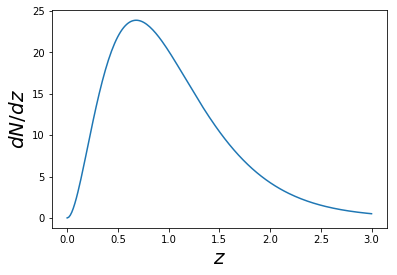

In [207]:
plt.plot(z, dNdz)
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
plt.show()

In [208]:
lens1 = ccl.ClTracerLensing(cosmo, False, z=z, n=dNdz)

In [209]:
ell = np.logspace(0.1, 4)
cls = ccl.angular_cl(cosmo, lens1, lens1, ell)

In [210]:
ngal = 30.*60*60 / (3.0462*10**(-4)) # per steradian
ngal100 = 100.*60*60 / (3.0462*10**(-4)) # per steradian

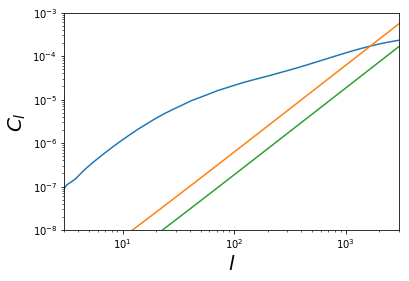

In [211]:
plt.loglog(ell, ell*(ell+1)*cls/np.pi)
plt.loglog(ell, ell*(ell+1)/np.pi*0.37**2/(2*ngal))
plt.loglog(ell, ell*(ell+1)/np.pi*0.37**2/(2*ngal100))
plt.xlabel(r'$l$', fontsize=20)
plt.ylabel(r'$C_l$', fontsize=20)
plt.ylim(1e-8, 1e-3)
plt.xlim(3, 3e3)
plt.show()

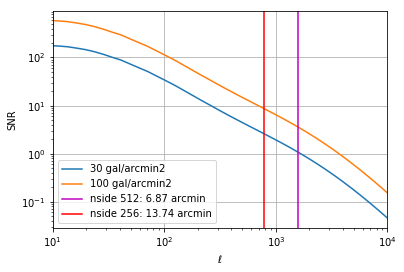

In [213]:
plt.loglog(ell, cls / (0.37**2/(2*ngal)), label='30 gal/arcmin2')
plt.loglog(ell, cls / (0.37**2/(2*ngal100)), label='100 gal/arcmin2')
plt.xlim(10,1e4)
plt.axvline(180/(hp.nside2resol(512, arcmin= True)/60),color='m', label='nside 512: %0.2f arcmin'%hp.nside2resol(512, arcmin= True))
plt.axvline(180/(hp.nside2resol(256, arcmin= True)/60),color='red', label='nside 256: %0.2f arcmin'%hp.nside2resol(256, arcmin= True))
plt.xlabel('$\ell$')
plt.ylabel('SNR')
plt.legend()
plt.grid()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


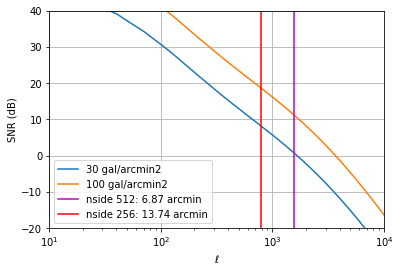

In [223]:
plt.semilogx(ell, 20*np.log10( cls / (0.37**2/(2*ngal))), label='30 gal/arcmin2')
plt.semilogx(ell,20*np.log10( cls / (0.37**2/(2*ngal100))), label='100 gal/arcmin2')
plt.xlim(10,1e4)
plt.ylim(-20,40)
plt.axvline(180/(hp.nside2resol(512, arcmin= True)/60),color='m', label='nside 512: %0.2f arcmin'%hp.nside2resol(512, arcmin= True))
plt.axvline(180/(hp.nside2resol(256, arcmin= True)/60),color='red', label='nside 256: %0.2f arcmin'%hp.nside2resol(256, arcmin= True))
plt.xlabel('$\ell$')
plt.ylabel('SNR (dB)')
plt.legend()
plt.grid()